# Adult Income Data Analysis

This project analyzes demographic and employment data to predict whether an individual's income exceeds $50K per year.

The dataset includes personal attributes such as age, education, occupation, and working hours.

| Column              | Description                                                |
| ------------------- | ---------------------------------------------------------- |
| **age**             | Age of the individual                                      |
| **workclass**       | Employment type (Private, Government, Self-employed, etc.) |
| **fnlwgt**          | Final weight (census population weight)                    |
| **education**       | Highest education level achieved                           |
| **educational-num** | Numeric representation of education level                  |
| **marital-status**  | Marital status                                             |
| **occupation**      | Job type                                                   |
| **relationship**    | Family relationship status                                 |
| **race**            | Race category                                              |
| **gender**          | Gender                                                     |
| **capital-gain**    | Income from investments                                    |
| **capital-loss**    | Loss from investments                                      |
| **hours-per-week**  | Working hours per week                                     |
| **native-country**  | Country of origin                                          |
| **income**          | Target variable (<=50K or >50K)                            |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data 

In [2]:
df = pd.read_csv('D:\\Microsoft-Machine-Learning-Engineer-DEPI-Round4\\Data\\adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Data Understanding

In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [17]:
df.isin(['?']).sum()


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
age_group             0
capital_net           0
high_hours            0
dtype: int64

In [ ]:

df.replace("?", np.nan, inplace=True)

categorical_cols = ['workclass', 'occupation', 'native-country']

for col in categorical_cols:
    df[col].fillna("Unknown", inplace=True)

df.isnull().sum()


C:\Users\Basmala\AppData\Local\Temp\ipykernel_35616\1050398587.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
age_group          0
capital_net        0
high_hours         0
dtype: int64

### Feature Engineering

#### Create Age Groups

In [27]:
df['age_group'] = pd.cut(df['age'],
                           bins=[0,25,40,60,100],
                           labels=['Young','Adult','Senior','Elder'])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_group,capital_net,high_hours
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Young,0,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Adult,0,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Adult,0,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Senior,7688,False
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K,Young,0,False


In [32]:
df['education_level'] = pd.cut(df['educational-num'],
                               bins=[0,5,10,15,20], 
                                 labels=['Low','Medium','High','Very High'])
df.head()



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_group,capital_net,high_hours,education_level
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Young,0,False,Medium
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Adult,0,True,Medium
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Adult,0,False,High
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Senior,7688,False,Medium
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K,Young,0,False,Medium


#### Create Capital Net

In [28]:
df['capital_net'] = df['capital-gain'] - df['capital-loss']
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_group,capital_net,high_hours
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Young,0,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Adult,0,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Adult,0,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Senior,7688,False
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K,Young,0,False


#### High Work Hours Flag

In [29]:
df['high_hours'] = df['hours-per-week'] > 40
df.head()




,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_group,capital_net,high_hours
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Young,0,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Adult,0,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Adult,0,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Senior,7688,False
4,18,Unknown,103497,Some-college,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K,Young,0,False


### Exploratory Data Analysis

#### Income Distribution

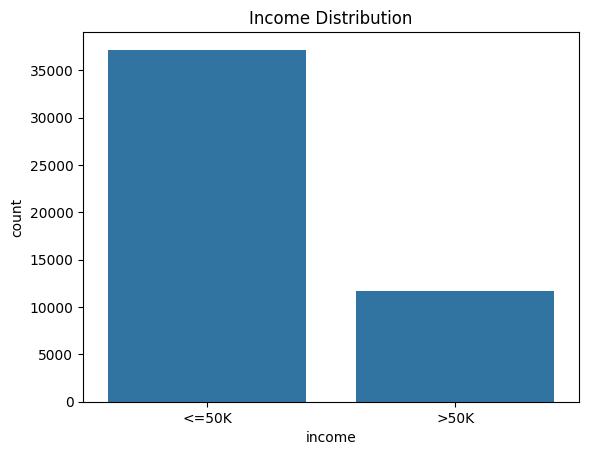

In [14]:
sns.countplot(data=df, x='income')
plt.title("Income Distribution")
plt.show()


#### Age vs Income

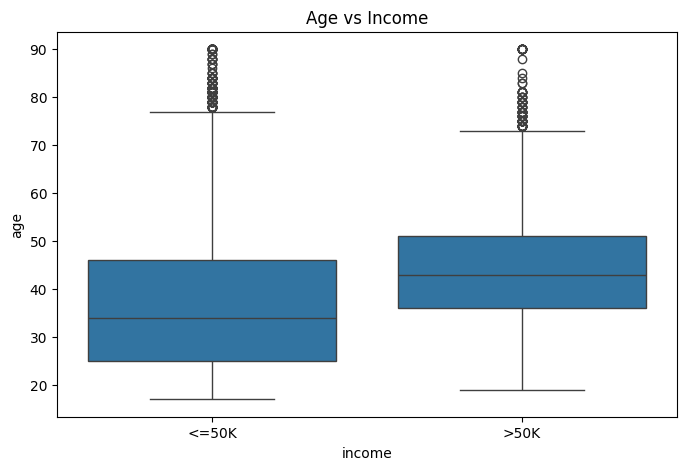

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='income', y='age')
plt.title("Age vs Income")
plt.show()


#### Education vs Income

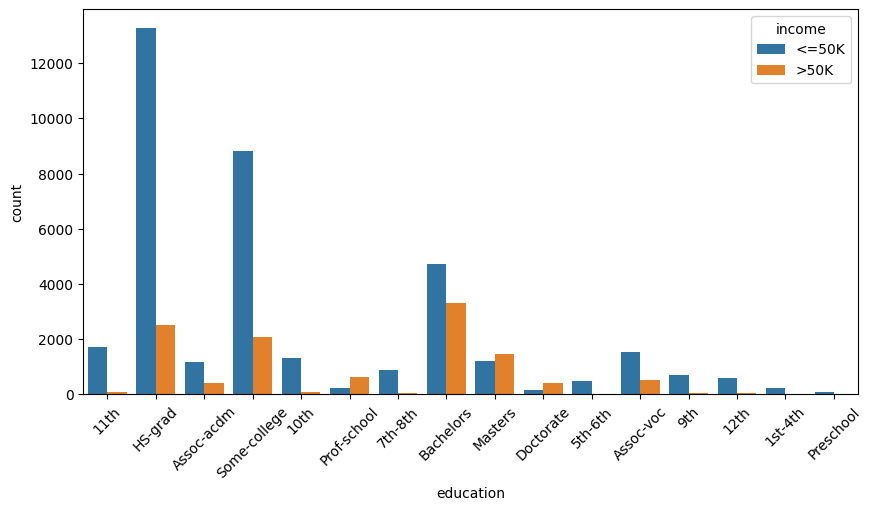

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education', hue='income')
plt.xticks(rotation=45)
plt.show()


#### Hours Per Week Distribution

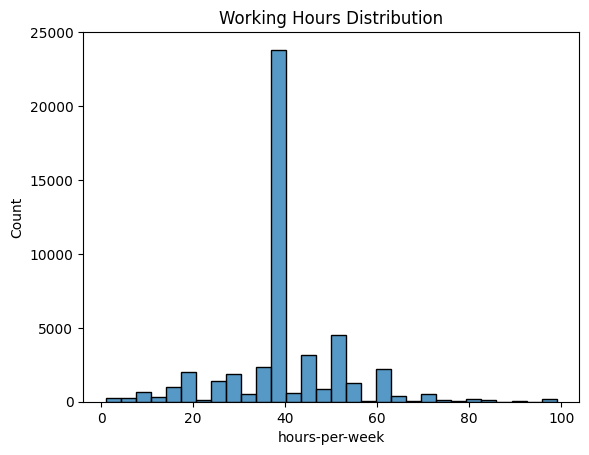

In [17]:
sns.histplot(data=df['hours-per-week'], bins=30)
plt.title("Working Hours Distribution")
plt.show()


#### Capital Gain Impact

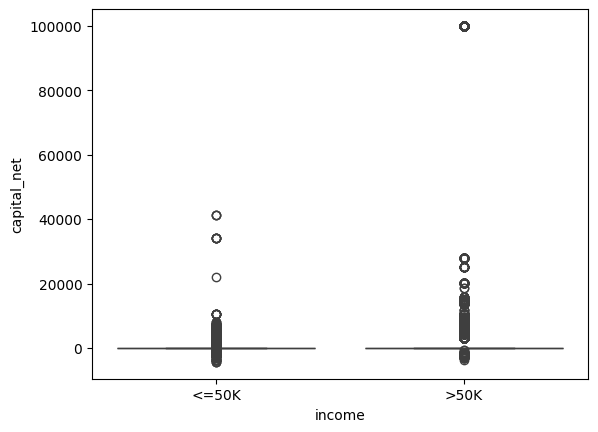

In [ ]:
sns.boxplot(data=df, x='income', y='capital_net')
plt.show()



#### Correlation Heatmap

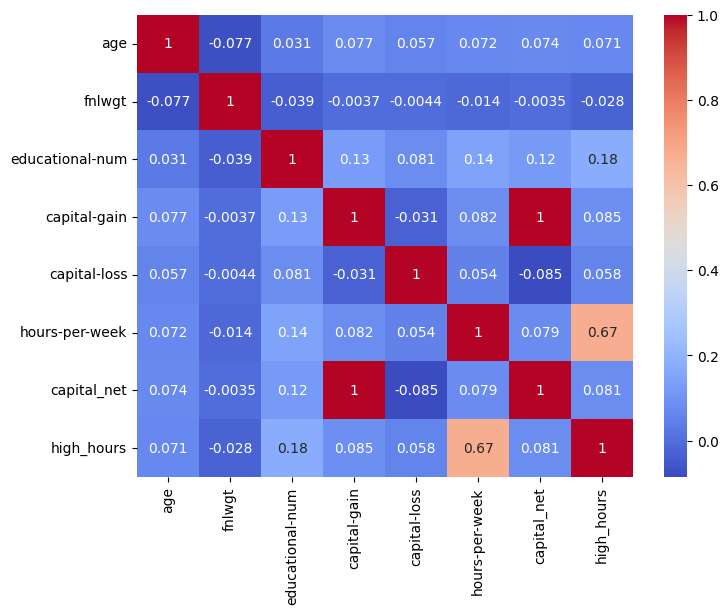

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


### Income by Age Group

<Figure size 640x480 with 0 Axes>

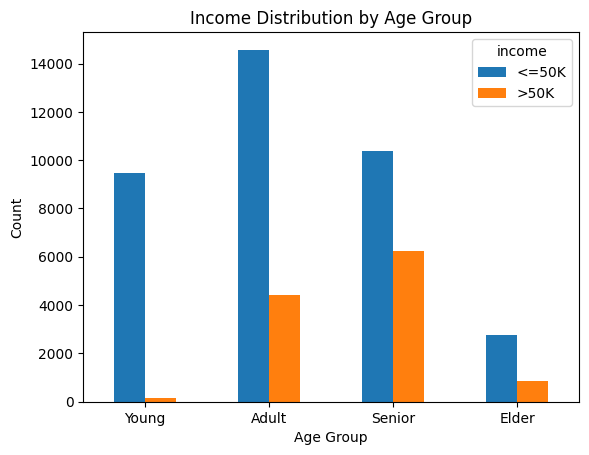

In [10]:
plt.figure()
pd.crosstab(df['age_group'], df['income']).plot(kind='bar')
plt.title("Income Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

### Percentage Income by Age Group

<Figure size 640x480 with 0 Axes>

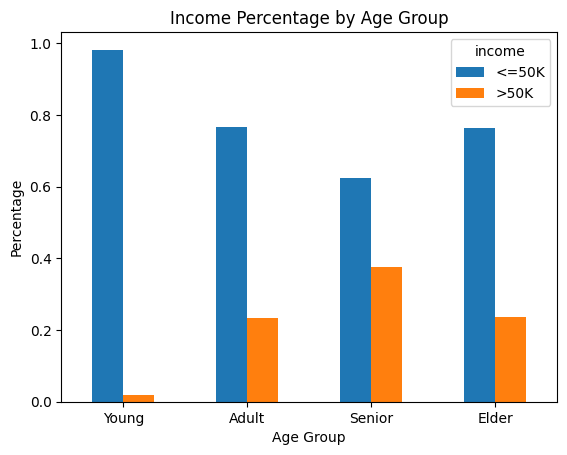

In [11]:
plt.figure()
pd.crosstab(df['age_group'], df['income'], normalize='index').plot(kind='bar')
plt.title("Income Percentage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()


### High Working Hours vs Income

<Figure size 640x480 with 0 Axes>

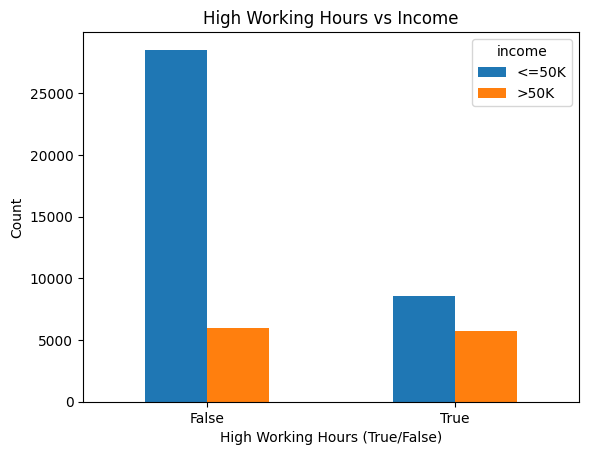

In [12]:
plt.figure()
pd.crosstab(df['high_hours'], df['income']).plot(kind='bar')
plt.title("High Working Hours vs Income")
plt.xlabel("High Working Hours (True/False)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


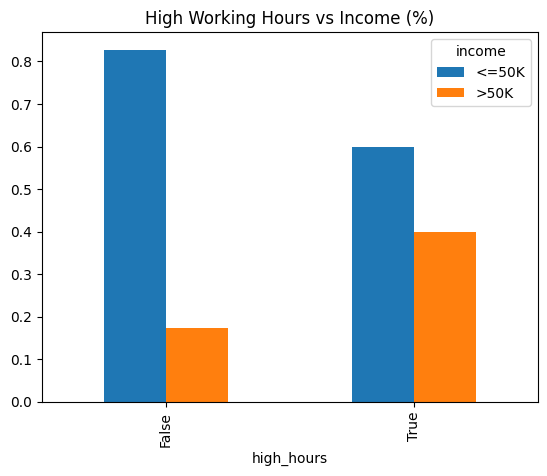

In [13]:
pd.crosstab(df['high_hours'], df['income'], normalize='index').plot(kind='bar')
plt.title("High Working Hours vs Income (%)")
plt.show()


### Capital Net vs Income

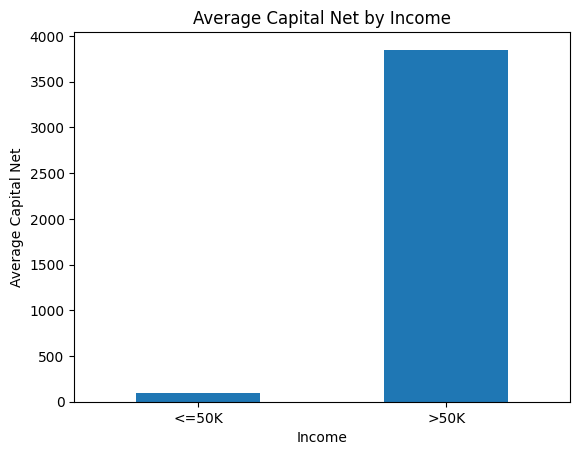

In [14]:
plt.figure()
df.groupby('income')['capital_net'].mean().plot(kind='bar')
plt.title("Average Capital Net by Income")
plt.xlabel("Income")
plt.ylabel("Average Capital Net")
plt.xticks(rotation=0)
plt.show()


### Marital Status vs Income

<Figure size 640x480 with 0 Axes>

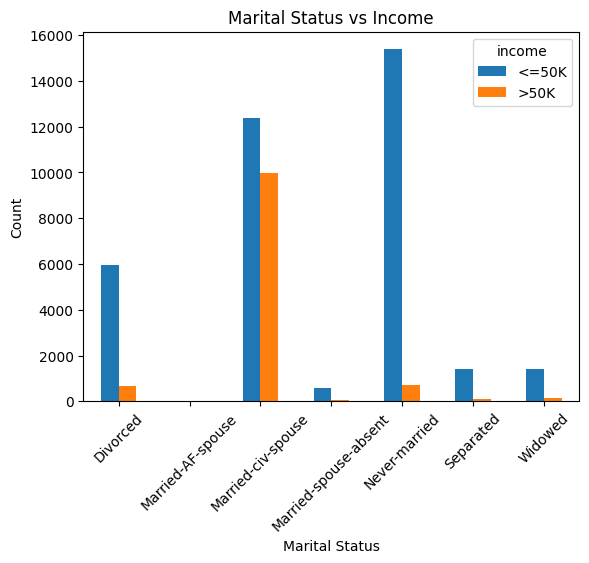

In [16]:
plt.figure()
pd.crosstab(df['marital-status'], df['income']).plot(kind='bar')
plt.title("Marital Status vs Income")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### Removing Outliers

In [20]:
Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['hours-per-week'] < (Q1 - 1.5 * IQR)) |
              (df['hours-per-week'] > (Q3 + 1.5 * IQR)))]


In [22]:
num_cols = ['age','fnlwgt','educational-num','hours-per-week','capital-gain','capital-loss','capital_net']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]


#### Visualize After Removing Outliers

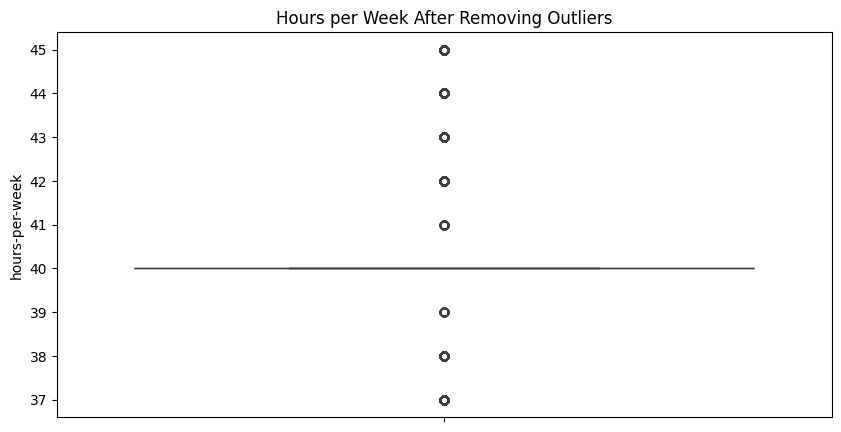

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df['hours-per-week'])
plt.title("Hours per Week After Removing Outliers")
plt.show()


### **Key Insights**

- Higher education levels correlate with higher income.

- People working more than 40 hours are more likely to earn >50K.

- Capital gain strongly impacts income.

- Age group "Adult" dominates high-income category.